# Operator Entanglement Studies on Qubit States of 6 Parties

In [3]:
from scipy.stats import unitary_group
import itertools
from itertools import permutations
from itertools import combinations
import numpy as np
from numpy import linalg as la
from numpy.linalg import eig
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import itertools
import math
import cmath
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import random
import array as arr
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes,InsetPosition)

In [4]:
def ConjugateTranspose(self):
    return self.conj().T

## The Reshaping Function

In [5]:
def Reshape(U,per):
    d=2
    return U.reshape([d,d,d,d,d,d]).transpose(per).reshape(d**2,d**4)

## The Entropy Vector Corresponding to Bipartitions of A,B,C

In [6]:
def Ent(U,indexlist):
    d=2
    UR=Reshape(U,indexlist)
    Unew=la.matrix_power(np.dot(UR,ConjugateTranspose(UR)),2)
    return 1/(1-1/d**2)*(1-(1/(d**6))*Unew.trace())

In [7]:
def EntVec(U):
    E_test=Ent(U,[0,1,2,3,4,5])
    E1=Ent(U,[0,3,1,2,4,5])
    E2=Ent(U,[1,4,0,2,3,5])
    E3=Ent(U,[2,5,0,1,3,4])
    EntU=[E_test,E1,E2,E3]
    return EntU

In [8]:
def EntVecExt(U):
    EntU=[]
    l=[0,1,2,3,4,5]
    for x in combinations(l,2):
        indexlist=x+tuple(set(l).difference(set(x)))
        EntU.append(Ent(U,indexlist))
    return EntU

In [9]:
#EntVecExt(AME62)

In [10]:
#Note that these also correspond to the density matrices of bipartite cuts of the form 2|4 of the 6 parties 
#- AA'|BB'CC',BB'|AA'CC'',CC'|AA'BB'

### Test Run

In [12]:
U_test=unitary_group.rvs(8)
#UR=Reshape(U_test,[0,1,2,3,4,5])
#Unew=la.matrix_power(np.dot(ConjugateTranspose(UR),UR),2)
#Unew.trace()
EntVec(U_test)[0]

(0.9999999999999998+4.494453125537326e-18j)

## A Distribution of the 3 Primary Operator Entropies for $10^6$ Samples

In [13]:
x=[]
y=[]
z=[]
for i in range(10**6):
    U_loop=unitary_group.rvs(8)
    x.append(EntVec(U_loop)[1])
    y.append(EntVec(U_loop)[2]) 
    z.append(EntVec(U_loop)[3])

### Maximum Values :-

In [14]:
print('Max Ent1=', max(x))
print('Max Ent2=', max(y))
print('Max Ent3=', max(z))

Max Ent1= (0.9988435457853717-3.815601083064871e-18j)
Max Ent2= (0.9994457102844145+1.2874900798265365e-18j)
Max Ent3= (0.9992187624304801+4.8969798123928614e-18j)


In [79]:
#Thus, no comment can be made about whether the 'Dual' line is connected or not from this data as the values of E1,E2 & E3 are themselves NOT maximized individually - let alone simultaneously. 

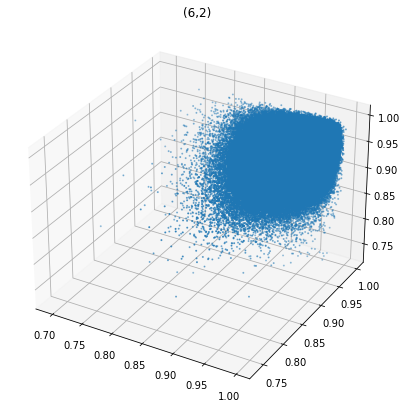

In [33]:
from mpl_toolkits.mplot3d import axes3d   
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x,y,z,s=1)
plt.title('(6,2)')
#plt.axis([0.99999, 1.0000001,0.99999,1.0000001])
plt.show()

## Perturbing AME(6,2) to get behaviour near the 3-Unitary

In [25]:
import scipy.io
mat = scipy.io.loadmat('Unitary3.mat')
AME62=mat['Expression1']

In [27]:
#EntVecExt(AME62)

### Perturbation as $U_{new}=U_{AME_{(6,2)}}*exp(i*\lambda*H)$

In [28]:
from scipy.linalg import expm
def Perturb(per_par):
    ent_list=[]
    for i in range(10**2):
        A=np.random.randn(8,8)
        H=(A+ConjugateTranspose(A))/2
        U_per=expm(1j*per_par*H)
        ent_list.append(EntVecExt(AME62@U_per))
    return ent_list

In [29]:
E1_list_AME_Perturbed=[]
E2_list_AME_Perturbed=[]
E3_list_AME_Perturbed=[]
#The Primary Entropies
E_list_AME_Perturbed=[]
for i in range(-3000,0,10):
    ent_list=[]
    per_par=10**(i/1000)
    ent_list=Perturb(per_par)
    
    for j in range(100):
        E1_list_AME_Perturbed.append(ent_list[j][1])
        E2_list_AME_Perturbed.append(ent_list[j][2])
        E3_list_AME_Perturbed.append(ent_list[j][3])
        E_list_AME_Perturbed.append(ent_list)

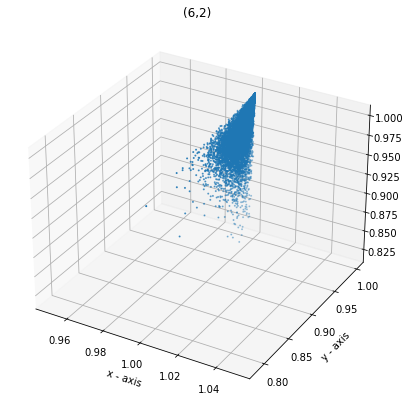

In [36]:
#plt.figure(figsize=(4, 3))
#plt.scatter(E1_list_AME_Perturbed, E2_list_AME_Pertured,s=1)
#plt.scatter(E1_list_perm, E2_list_perm,s=10)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(E1_list_AME_Perturbed,E2_list_AME_Perturbed,E3_list_AME_Perturbed,s=1)
plt.axhline(y=1, color='r', linestyle='-')
plt.axvline(x=1, color='r', linestyle='-')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('(6,2)')
#plt.axis([0.99999, 1.0000001,0.99999,1.0000001])
plt.show()

### An Interactive Plot of the 3 Primary Entropies

<IPython.core.display.Javascript object>


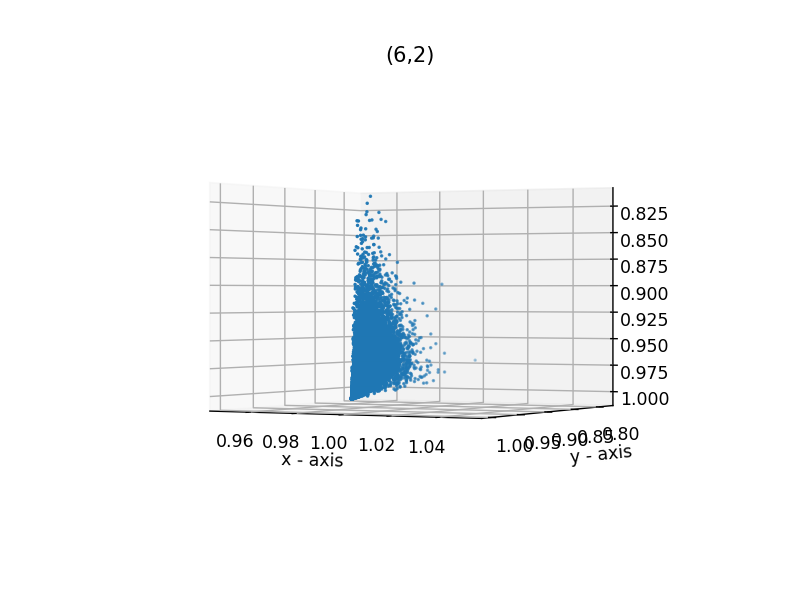

In [47]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(E1_list_AME_Perturbed,E2_list_AME_Perturbed,E3_list_AME_Perturbed,s=1)
ax.scatter3D(E1_list_perm,E2_list_perm,E3_list_perm,s=3)
plt.axhline(y=1, color='r', linestyle='-')
plt.axvline(x=1, color='r', linestyle='-')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('(6,2)')
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
plt.show()

## Generating Permutations of Order 8

In [17]:
perm_list=[]
E1_list_perm=[]
E2_list_perm=[]
E3_list_perm=[]
E_list_perm=[]
for per in permutations([0,1,2,3,4,5,6,7]):
    a=np.eye(8)
    a[[0,1,2,3,4,5,6,7]]=np.eye(8)[[per]]
    perm_list.append(a)
    #l=EntVec(a)
    l=EntVecExt(a)
    #E1_list_perm.append(l[1])
    #E2_list_perm.append(l[2])
    #E3_list_perm.append(l[3])
    E_list_perm.append(l)

C:\Users\rohan\AppData\Local\Temp/ipykernel_1012/1782975070.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  a[[0,1,2,3,4,5,6,7]]=np.eye(8)[[per]]


### A 2-Unitary Permutation Matrix on (6,2)

In [48]:
E_list_perm.index([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
EntVecExt(perm_list[1895])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [62]:
mydata=perm_list[1895]
scipy.io.savemat('test.mat', {'mydata': mydata})

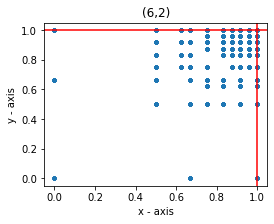

In [24]:
def EntExtract(pos):
    l=[E_list_perm[i][pos] for i in range(math.factorial(8))]
    return l


plt.figure(figsize=(4, 3))
plt.scatter(EntExtract(4),EntExtract(6),s=10)
#fig = plt.figure(figsize = (10, 7))
#ax = plt.axes(projection ="3d")
#ax.scatter3D(E1_list,E2_list,E3_list,s=1)
#ax.scatter3D(E1_list_perm,E2_list_perm,E3_list_perm,s=3)
plt.axhline(y=1, color='r', linestyle='-')
plt.axvline(x=1, color='r', linestyle='-')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('(6,2)')
#plt.axis([0.8, 1.1,0.8,1.1])
plt.show()